In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [6]:
# Load the data
data = pd.read_csv('shuffled_dataset.csv')

# Handle NaN values
# data.interpolate(inplace=True)

print("Safe and Unsafe data:", data.shape)

data.head()

Safe and Unsafe data: (31051, 27)


,SQL statement,SQL Statement Tainted,HTML Tag,HTML Tag Tainted,Dangerous Function,Dangerous Function Tainted,Import Functions,Import Functions Tainted,URI Scheme,URI Scheme Tainted,...,Property Check,Default Object Assignment,Dynamic Object Assignment,Array Copy,SQLi,XSS,Command/Code Injection,File Inclusion,No Input Validation,Prototype Pollution
0,0.0,0.0,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.500000,0.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.065409,0.648696,0.0,0.525034,0.454172,0.0,0.0,0.142367,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
# Cut the data 21 columns as X and last 6 columns as Y
X = data.iloc[:, :-6]
X.head()

,SQL statement,SQL Statement Tainted,HTML Tag,HTML Tag Tainted,Dangerous Function,Dangerous Function Tainted,Import Functions,Import Functions Tainted,URI Scheme,URI Scheme Tainted,...,Conditional Operators,IF Statement,Prototype Assignment,Object Assignment,Object Manipulation,JSON Parse,Property Check,Default Object Assignment,Dynamic Object Assignment,Array Copy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,...,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.233,0.0692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,...,0.000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
Y = data.iloc[:, -6:]
Y.head()

,SQLi,XSS,Command/Code Injection,File Inclusion,No Input Validation,Prototype Pollution
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
# Count all Y that are all zeros
print("Non Vulnerables: ", Y[Y.sum(axis=1) == 0].shape)
# Count all Y that contains at least one 1
print("Vulnerables: ", Y[Y.sum(axis=1) > 0].shape)

Non Vulnerables:  (828, 6)
Vulnerables:  (30223, 6)


In [11]:
# Split the data into training and testing sets 70% training and 30% testing
# Remove first row of column names
X = X.astype(float)
Y = Y.astype(float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (21735, 21)
Y_train: (21735, 6)
X_test: (9316, 21)
Y_test: (9316, 6)


In [12]:
# Train the model
# Columns 1-21 are the X values and columns 22-27 are the Y values
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predict the test data
Y_pred = model.predict(X_test)
# Print the classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3493
           1       1.00      0.98      0.99      5344
           2       1.00      0.98      0.99      4023
           3       1.00      0.96      0.98      2015
           4       1.00      0.99      0.99      4757
           5       0.98      0.91      0.94       603

   micro avg       1.00      0.98      0.99     20235
   macro avg       0.99      0.97      0.98     20235
weighted avg       1.00      0.98      0.99     20235
 samples avg       0.96      0.96      0.96     20235



/home/srn/bloom-experiment-lab/dataprocessing/parsergen/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/srn/bloom-experiment-lab/dataprocessing/parsergen/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/srn/bloom-experiment-lab/dataprocessing/parsergen/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter

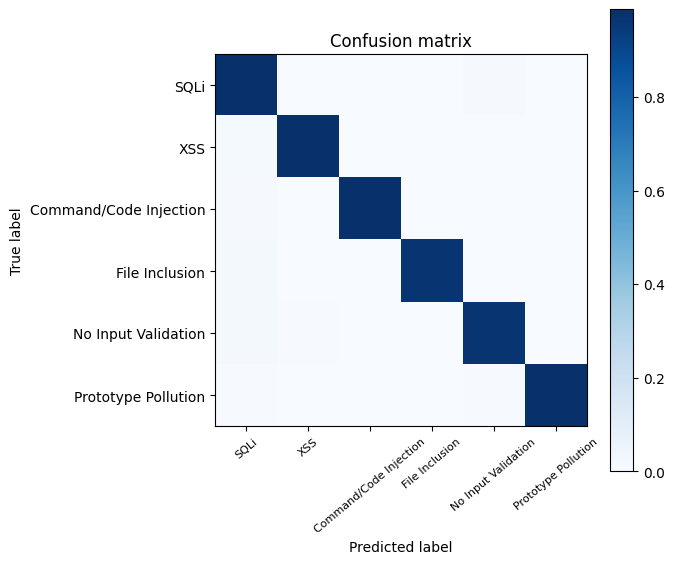

In [14]:
# Plot the confusion matrix
def plot_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred.argmax(axis=1))
    cm = cm / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(Y.columns))
    plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
    plt.yticks(tick_marks, Y.columns)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(Y_test, Y_pred)

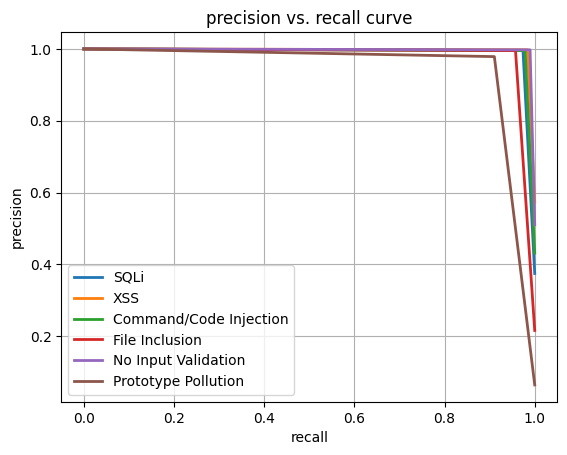

In [15]:
# Print the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()

In [16]:
# Save the model
filename = 'bloom_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# clean the plot
plt.clf()

# Try Multionomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(X_train, Y_train.values.argmax(axis=1))
Y_pred = model.predict(X_test)
print(classification_report(Y_test.values.argmax(axis=1), Y_pred))


In [ ]:
# Print the confusion matrix
cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(Y.columns))
plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
plt.yticks(tick_marks, Y.columns)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred)
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()


In [ ]:
plt.clf()

# Try SVM model
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train.values.argmax(axis=1))
Y_pred = model.predict(X_test)
print(classification_report(Y_test.values.argmax(axis=1), Y_pred))

In [ ]:
# Print the confusion matrix
cm = confusion_matrix(Y_test.values.argmax(axis=1), Y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(Y.columns))
plt.xticks(tick_marks, Y.columns, rotation=40, fontsize=8)
plt.yticks(tick_marks, Y.columns)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred)
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()

In [ ]:
plt.clf()

# Try Backpropagation Neural Network
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

In [ ]:
# Print the confusion matrix
plot_confusion_matrix(Y_test, Y_pred)

In [ ]:
# Print the Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(Y.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(Y_test.iloc[:, i], Y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format(Y.columns[i]))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
# add grid
plt.grid()
plt.show()